## Comparing the standard SST algorithm to microwave SST

### Do FLC events cause a bias in IR-derived SST?

Summed bias over a month of SST in the high-FLC region of the Gulf Stream

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

In [2]:
mw_path = 'MW_SST/20230401120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc'
mw_ds = xr.open_dataset(mw_path)

noaa_path = 'NOAA_SST/20230401000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc'
noaa_ds = xr.open_dataset(noaa_path)

In [3]:
#---Northeast US
min_lon = -83
min_lat = 26
max_lon = -51
max_lat = 50

In [4]:
mw_ds_crop = mw_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
noaa_ds_crop = noaa_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

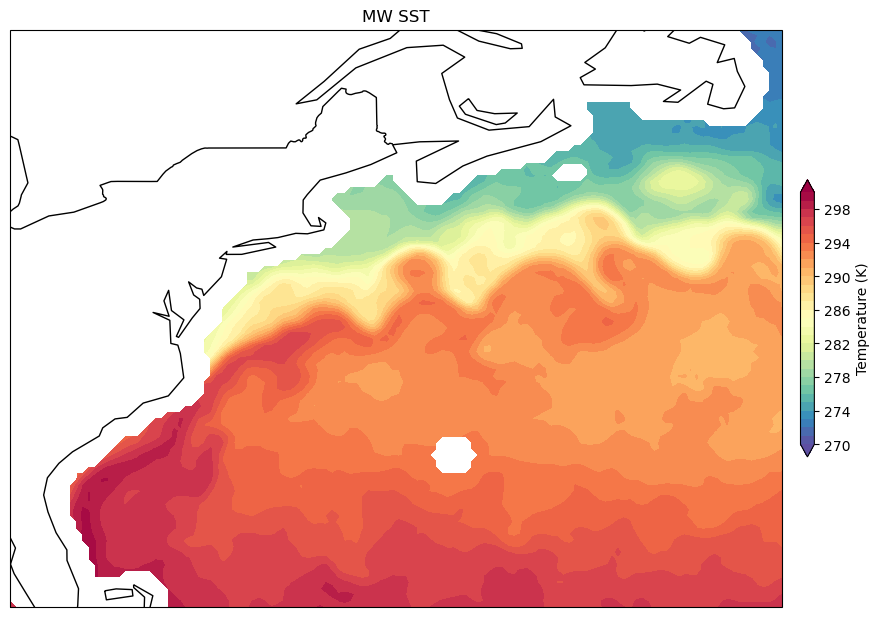

In [5]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(270, 300, 31)

c=ax.contourf(mw_ds_crop.lon, mw_ds_crop.lat, mw_ds_crop.analysed_sst[0], cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('MW SST')
clb.set_label('Temperature (K)')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)

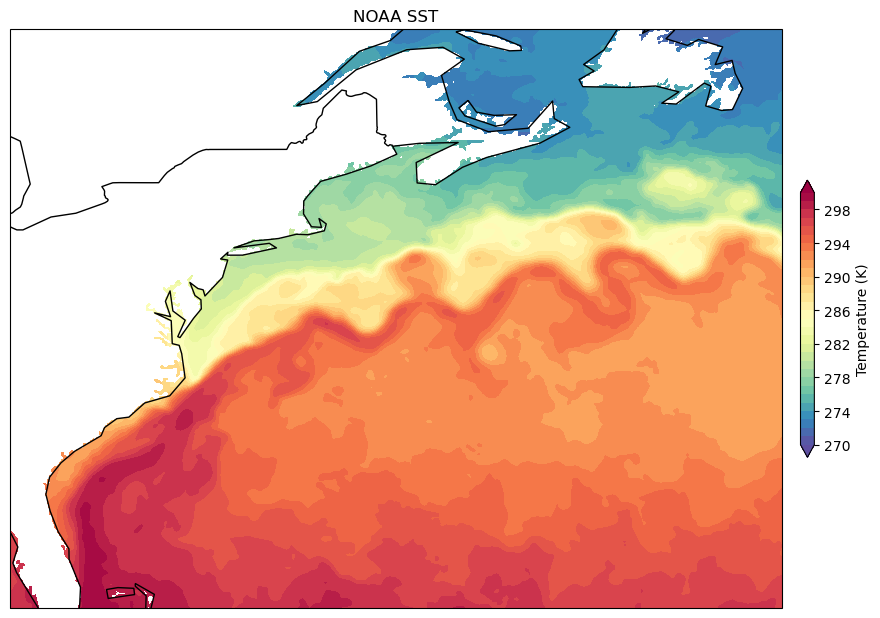

In [6]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(270, 300, 31)

c=ax.contourf(noaa_ds_crop.lon, noaa_ds_crop.lat, noaa_ds_crop.analysed_sst[0], cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('NOAA SST')
clb.set_label('Temperature (K)')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)

In [7]:
mw_sst = mw_ds_crop['analysed_sst'].values.flatten()
noaa_sst = noaa_ds_crop['analysed_sst'].values.flatten()

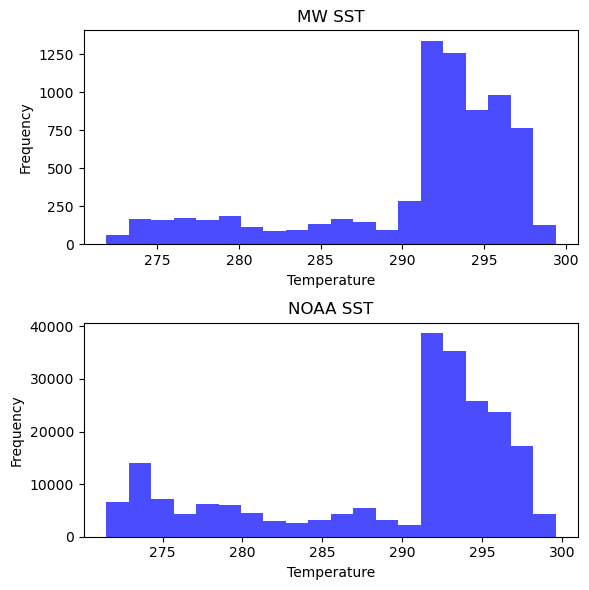

In [8]:
fig,ax=plt.subplots(2, figsize=(6,6))

ax[0].hist(mw_sst, bins=20, color='blue', alpha=0.7)
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Frequency')
ax[0].set_title('MW SST')

ax[1].hist(noaa_sst, bins=20, color='blue', alpha=0.7)
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Frequency')
ax[1].set_title('NOAA SST')

fig.tight_layout()
plt.show()

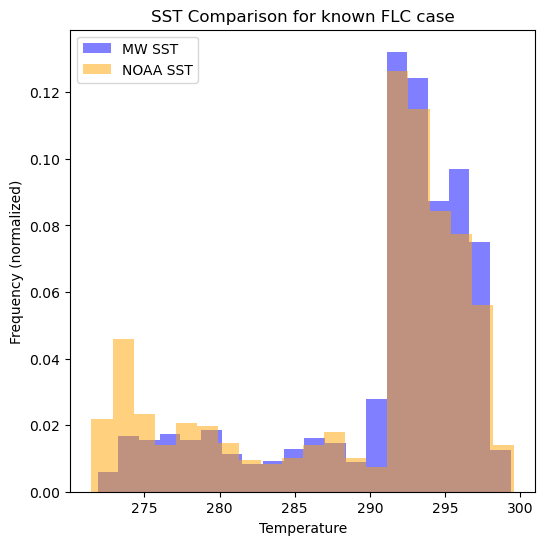

In [9]:
fig,ax=plt.subplots(1, figsize=(6,6))

ax.hist(mw_sst, bins=20, color='blue', alpha=0.5, label='MW SST', density=True)
ax.hist(noaa_sst, bins=20, color='orange', alpha=0.5, label='NOAA SST', density=True)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency (normalized)')
ax.set_title('SST Comparison for known FLC case')

plt.legend()
plt.grid(False)
plt.show()

In [32]:
def compile_SST(directory):
    tot_ds = xr.Dataset(
        data_vars={
            "analysed_sst": (("time", "lat", "lon"), np.nan * np.ones((0, len(noaa_ds_crop.lat), len(noaa_ds_crop.lon))))
        },
        coords={
            "time": [],
            "lat": noaa_ds_crop.lat,
            "lon": noaa_ds_crop.lon
        },
        attrs={
            "description": "",
        }
    )
    
    for filename in os.listdir(directory):
        print(filename)
        ds = xr.open_dataset(directory+'/'+filename)
        ds_crop = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
    
        tot_ds = xr.concat([tot_ds, ds_crop], dim="time")
    return tot_ds

In [33]:
tot_ds_noaa = compile_SST('NOAA_SST')
tot_ds_mw = compile_SST('MW_SST')

20230412000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230408000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230403000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230401000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230404000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230402000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230413000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230407000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230410000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230411000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230415000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230427000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc
20230414000000-O

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


20230415120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230409120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230403120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc


/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


20230414120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230405120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230407120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc


/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


20230412120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230402120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230427120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc


/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


20230406120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230411120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230408120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc


/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


20230321120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc
20230410120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc


/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


In [34]:
tot_sst_noaa = tot_ds_noaa['analysed_sst'].values.flatten()
tot_sst_mw = tot_ds_mw['analysed_sst'].values.flatten()

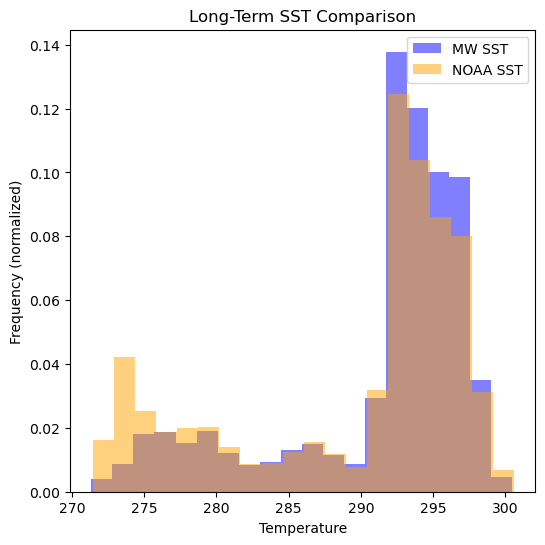

In [35]:
fig,ax=plt.subplots(1, figsize=(6,6))

ax.hist(tot_sst_mw, bins=20, color='blue', alpha=0.5, label='MW SST', density=True)
ax.hist(tot_sst_noaa, bins=20, color='orange', alpha=0.5, label='NOAA SST', density=True)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency (normalized)')
ax.set_title('Long-Term SST Comparison')

plt.legend()
plt.grid(False)
plt.show()

### Running for a control (non-FLC) case

Use the same range of time, but over a non-FLC region

In [ ]:
mw_path = 'MW_SST/20230410120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.1.nc'
mw_ds = xr.open_dataset(mw_path)

noaa_path = 'NOAA_SST/20230427000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0.nc'
noaa_ds = xr.open_dataset(noaa_path)

In [ ]:
mw_ds_crop_c = mw_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
noaa_ds_crop_c = noaa_ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

In [ ]:
mw_sst_c = mw_ds_crop_c['analysed_sst'].values.flatten()
noaa_sst_c = noaa_ds_crop_c['analysed_sst'].values.flatten()

In [ ]:
fig,ax=plt.subplots(1, figsize=(6,6))

ax.hist(mw_sst_c, bins=20, color='blue', alpha=0.5, label='MW SST', density=True)
ax.hist(noaa_sst_c, bins=20, color='orange', alpha=0.5, label='NOAA SST', density=True)

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency (normalized)')
ax.set_title('SST Comparison for control (non-FLC) case')

plt.legend()
plt.grid(False)
plt.show()

In [ ]:
print("MW SST FLC mean: ", np.nanmean(mw_sst))
print("NOAA SST FLC mean: ", np.nanmean(noaa_sst))

print("MW SST control mean: ", np.nanmean(mw_sst_c))
print("NOAA SST control mean: ", np.nanmean(noaa_sst_c))